In [3]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
housing=pd.read_csv("housing.csv",header=None, delimiter=r"\s+",names=column_names)


In [5]:
housing.head(5)
learning_rate=0.01
iters=1000
cost=np.zeros(iters)

In [6]:
housing.info


<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [7]:
#normaalise using feature scale
housing=(housing-housing.mean())/housing.std()
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [8]:
housing.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-7.021173e-17,2.611876e-15,-1.148313e-14,-1.200621e-15,7.161597e-16,1.123388e-16,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16,-2.864639e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00,-1.906340e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01,-5.988631e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01,-1.449159e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01,2.682577e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00,2.986505e+00


In [9]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
#house=np.genfromtxt("housing.csv")
#print(housing.shape)
#indices=range(housing.shape[0])

#print(indices)

In [11]:
"""
print(housing.shape)
num_of_rows=int(housing.shape[0]*0.8)
indices=range(housing.shape[0])
np.random.shuffle(indices)
train_data=housing.iloc[:num_of_rows]
test_data=housing.iloc[num_of_rows:]
train_data.sort()
test_data.sort()
"""


'\nprint(housing.shape)\nnum_of_rows=int(housing.shape[0]*0.8)\nindices=range(housing.shape[0])\nnp.random.shuffle(indices)\ntrain_data=housing.iloc[:num_of_rows]\ntest_data=housing.iloc[num_of_rows:]\ntrain_data.sort()\ntest_data.sort()\n'

In [12]:
x=pd.DataFrame(housing).to_numpy()
y=pd.DataFrame(housing).to_numpy()
print(x.shape,y.shape)
t=(int)(0.8*len(x))
print(type(x))
 

(506, 14) (506, 14)
<class 'numpy.ndarray'>


In [13]:
x_train,y_train=x[:t,:],y[:t,:]
x_test,y_test=x[t:,:],y[t:,:]
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(404, 14) (102, 14) (102, 14) (404, 14)


In [14]:
print(len(x_train))
train_b=np.ones((len(x_train),1))
test_b=np.ones((len(x_test),1))
#print(train_b)


404


In [15]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
x_train[13]=train_b
x_test[13]=test_b

print(x_train.head())
print(x_train.shape,x_test.shape)


          0         1         2         3         4         5         6  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

          7         8         9        10        11        12   13  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  1.0  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  1.0  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  1.0  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  1.0  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  1.0  
(404, 14) (102, 14)


In [16]:
"""x_train=(x_train-x_train.mean())/x_train.std()
x_test=(x_test-x_test.mean())/x_test.std()"""

'x_train=(x_train-x_train.mean())/x_train.std()\nx_test=(x_test-x_test.mean())/x_test.std()'

In [17]:
weight=np.zeros([1,14],dtype='float')

In [18]:
x_train=pd.DataFrame(x_train).to_numpy()
x_test=pd.DataFrame(x_test).to_numpy()


In [19]:
print(x_train.shape,weight.T.shape)
def hypo(x_train,weight):
    return np.dot(x_train,weight.T)
p=np.dot(x_train,weight.T)
print(p.shape)

(404, 14) (14, 1)
(404, 1)


In [49]:
def cost_function(x_train,y_train,weight):
    p=hypo(x_train,weight)
    sum=0
    for i in range(len(p)):
        sum+=(y_train[i,0]-p[i,0])**2
    return sum/len(p)    
    

In [42]:
len(x_train)

404

In [43]:
x_train.shape


(404, 14)

In [44]:
def gd(weight,x_train,y_train,learning_rate):
    wt=np.zeros([len(x_train),14],dtype='float')
    s=np.zeros([len(x_train),1],dtype='float')
    p=hypo(x_train,weight)
    
    for i in range(len(x_train)):
        for j in range(14):
            wt[i,j]=-2*x_train[i,j]*(y_train[i,0]-p[i,0])
            
    for i in range(14):
        for j in range(len(x_train)): 
            s[i]+=wt[j,i]
            
    for i in range(14):
        weight[0,i]-=(s[i]/(len(x_train)*2))*learning_rate
        
    return weight

In [45]:
def train(x_train,y_train,weight,learning_rate,iters):
    for i in range(iters):
        gd(weight,x_train,y_train,learning_rate)
        cost[i]=cost_function(x_train,y_train,weight)
        if i%100 is 0:
            print(cost_function(x_train,y_train,weight),"\n")
            
        

In [46]:

train(x_train,y_train,weight,learning_rate,iters)
mse=cost_function(x_test,y_test,weight)
print("After errors, cost:\n")
print(mse)

1.0011279358225474e-06 

7.884970734106726e-07 

6.297738192361586e-07 

5.098566966296053e-07 

4.180990041609876e-07 

3.4695485454923946e-07 

2.910458743485672e-07 

2.465151553911138e-07 

2.1057831778197804e-07 

1.8121040574600074e-07 

After errors, cost:

1.0540059419315188e-06


Text(0.5, 1.0, 'Error vs. Training Epoch')

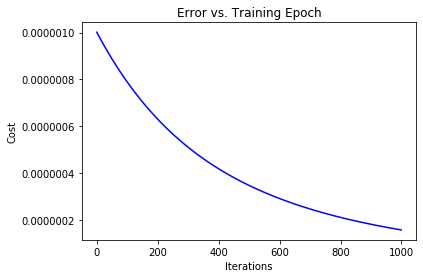

In [47]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  